In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### No point in implementing FFT by own.

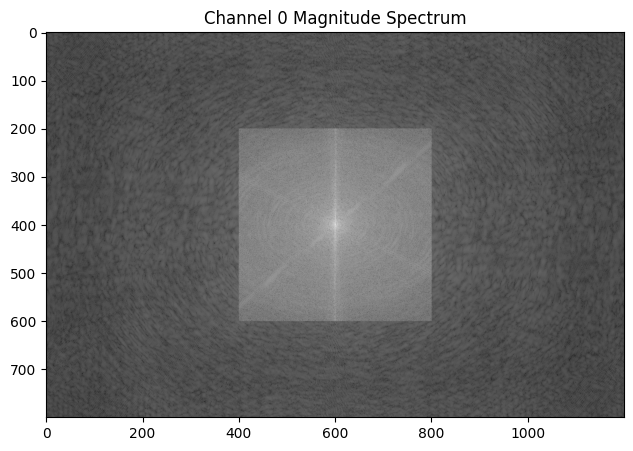

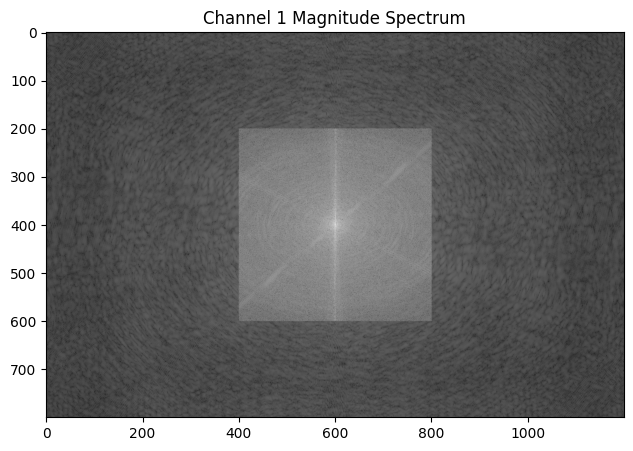

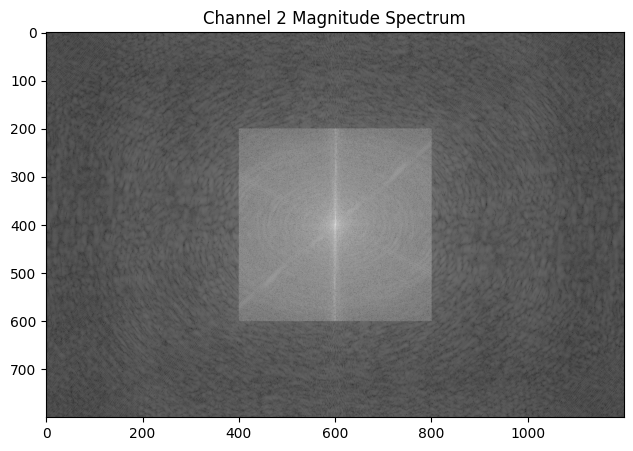

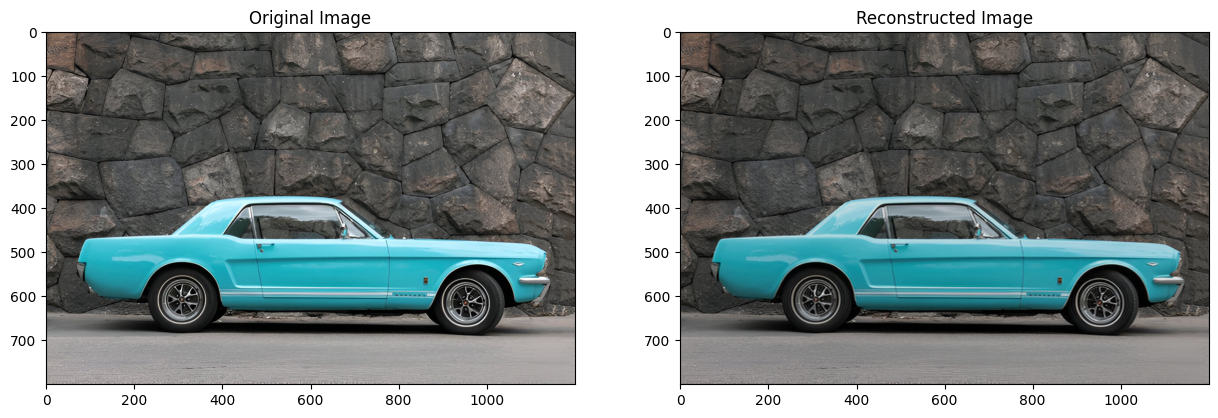

In [ ]:
# Read the color image
img = cv2.imread('dat/car_sideview.jpg')
# Convert from BGR (OpenCV default) to RGB for visualization
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create empty arrays for the reconstructed image
height, width, channels = img.shape
img_reconstructed = np.zeros_like(img, dtype=float)

# Process each channel separately
for channel in range(channels):
    # Get the current channel
    img_channel = img[:,:,channel]
    
    # fourier transform
    f = np.fft.fft2(img_channel)
    # Shift the zero frequency component to the center
    f_shifted = np.fft.fftshift(f)
    # Calculate the magnitude spectrum
    magnitude_spectrum = np.log(np.abs(f_shifted) + 1)  # Adding 1 to avoid log(0)
    # Normalize the magnitude spectrum to [0, 1]
    magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 1, cv2.NORM_MINMAX)
    
    # remove high frequencies
    window_size = 200
    f_shifted_temp = np.zeros_like(f_shifted)
    f_shifted_temp[f_shifted.shape[0]//2-window_size: f_shifted.shape[0]//2+window_size,
                   f_shifted.shape[1]//2-window_size: f_shifted.shape[1]//2+window_size] = f_shifted[f_shifted.shape[0]//2-window_size: f_shifted.shape[0]//2+window_size,
                   f_shifted.shape[1]//2-window_size: f_shifted.shape[1]//2+window_size]
    f_shifted = f_shifted_temp
    
    # Inverse Fourier transform
    f_ishifted = np.fft.ifftshift(f_shifted)
    # Inverse Fourier transform to get the image back
    img_channel_reconstructed = np.fft.ifft2(f_ishifted)
    # Take the real part of the inverse transform
    img_channel_reconstructed = np.abs(img_channel_reconstructed)
    
    # Store the reconstructed channel
    img_reconstructed[:,:,channel] = img_channel_reconstructed
    
    # do fourier transform again
    f_reconstructed = np.fft.fft2(img_channel_reconstructed)
    # Shift the zero frequency component to the center
    f_reconstructed_shifted = np.fft.fftshift(f_reconstructed)
    # Calculate the magnitude spectrum of the reconstructed image
    magnitude_spectrum_reconstructed = np.log(np.abs(f_reconstructed_shifted) + 1)
    # Normalize the magnitude spectrum of the reconstructed image to [0, 1]
    magnitude_spectrum_reconstructed = cv2.normalize(magnitude_spectrum_reconstructed, None, 0, 1, cv2.NORM_MINMAX)
    
    # Display the magnitude spectrum of the reconstructed image
    plt.figure(figsize=(10, 5))
    plt.imshow(magnitude_spectrum_reconstructed, cmap='gray')
    plt.title(f'Channel {channel} Magnitude Spectrum')
    plt.show()

# Normalize the reconstructed image to [0, 1]
img_reconstructed = cv2.normalize(img_reconstructed, None, 0, 1, cv2.NORM_MINMAX)

# Convert reconstructed image to RGB for display
img_reconstructed_rgb = cv2.cvtColor((img_reconstructed * 255).astype(np.uint8), cv2.COLOR_BGR2RGB)

# Display original and reconstructed images
plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(img_reconstructed_rgb)
plt.title('Reconstructed Image')
plt.show()

Following Wiener Filter code generated using Copilot. Clearly the filter does not work well (as said in the book). So no point in learning in detail. 

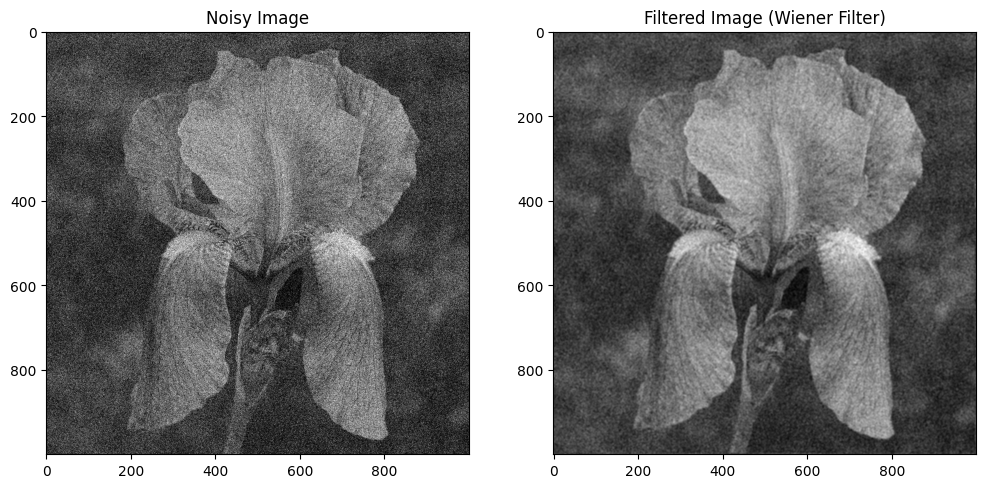

In [ ]:
img = cv2.imread('dat/Iris.jpg', cv2.IMREAD_GRAYSCALE)
# gaussian noise of mean 0 and sigma
sigma = 50

# Generate Gaussian noise with mean 0 and standard deviation sigma
noise = np.random.normal(0, sigma, img.shape)

# Add noise to the image
img_noisy = img.astype(float) + noise
img_noisy = np.clip(img_noisy, 0, 255).astype(np.uint8)

# apply wiener filter
def wiener_filter(img, noise_var, kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    img_fft = np.fft.fft2(img)
    kernel_fft = np.fft.fft2(kernel, s=img.shape)
    kernel_fft_conj = np.conj(kernel_fft)
    
    # Wiener filter formula
    wiener_filter = kernel_fft_conj / (np.abs(kernel_fft) ** 2 + noise_var)
    img_filtered_fft = img_fft * wiener_filter
    img_filtered = np.fft.ifft2(img_filtered_fft)
    
    return np.abs(img_filtered)
# Estimate noise variance
noise_var = sigma ** 2
# Apply Wiener filter
img_filtered = wiener_filter(img_noisy, noise_var)
# Normalize the filtered image to [0, 255]
img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
# Display the noisy and filtered images
plt.figure(figsize=(12, 6)) 
plt.subplot(121)
plt.imshow(img_noisy, cmap='gray')
plt.title('Noisy Image')
plt.subplot(122)
plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image (Wiener Filter)')
plt.show()


In [48]:
# TODO: If I have time later, I will implement DCT.